In [144]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import ipumspy as ipums
import xml.etree.ElementTree as ET
import numpy as np
import seaborn as sns
from scipy import stats
import random
from matplotlib.colors import Normalize, LogNorm
from scipy.stats import mode
import csv
import json

In [147]:
# # READS CSV CODEBOOK INTO INDUSTRY DICTIONARY- uncomment to rerun
# def csv_to_industry_dict(file_path):
#     industry_dict = {}
#     with open(file_path, mode='r', encoding='utf-8-sig') as file:
#         csv_reader = csv.reader(file)
#         for row in csv_reader:
#             if len(row) >= 3:
#                 industry_description = row[1].strip()
#                 census_code = row[3].strip()
#                 # Avoiding headers and irrelevant rows
#                 if census_code != '2017 Census Code' and census_code and industry_description and census_code[1].isdigit():
#                     industry_dict[census_code] = industry_description
#     return industry_dict

# industry_dict = csv_to_industry_dict('./data/codes/2017-industry-code-list.csv')

# industry_json_file_path = './data/codes/industry_codebook.json'
# with open(json_file_path, 'w', encoding='utf-8') as json_file:
#     json.dump(industry_dict, json_file, ensure_ascii=False, indent=4)

In [200]:
state_code_map = {
    "1": "Connecticut",
    "2": "Maine",
    "3": "Massachusetts",
    "4": "New Hampshire",
    "5": "Rhode Island",
    "6": "Vermont",
    "11": "Delaware",
    "12": "New Jersey",
    "13": "New York",
    "14": "Pennsylvania",
    "21": "Illinois",
    "22": "Indiana",
    "23": "Michigan",
    "24": "Ohio",
    "25": "Wisconsin",
    "31": "Iowa",
    "32": "Kansas",
    "33": "Minnesota",
    "34": "Missouri",
    "35": "Nebraska",
    "36": "North Dakota",
    "37": "South Dakota",
    "40": "Virginia",
    "41": "Alabama",
    "42": "Arkansas",
    "43": "Florida",
    "44": "Georgia",
    "45": "Louisiana",
    "46": "Mississippi",
    "47": "North Carolina",
    "48": "South Carolina",
    "49": "Texas",
    "51": "Kentucky",
    "52": "Maryland",
    "53": "Oklahoma",
    "54": "Tennessee",
    "56": "West Virginia",
    "61": "Arizona",
    "62": "Colorado",
    "63": "Idaho",
    "64": "Montana",
    "65": "Nevada",
    "66": "New Mexico",
    "67": "Utah",
    "68": "Wyoming",
    "71": "California",
    "72": "Oregon",
    "73": "Washington",
    "81": "Alaska",
    "82": "Hawaii",
    "83": "Puerto Rico",
    "96": "State groupings (1980 Urban/rural sample)",
    "97": "Overseas Military Installations",
    "98": "District of Columbia",
    "99": "State not identified"
}

industry_json_file_path = './data/codes/industry_codebook.json'
with open(industry_json_file_path, 'r', encoding='utf-8') as json_file:
    industry_code_map = json.load(json_file)

In [152]:
filename = "graphs/subsample_1percent/graph.pkl"
with open(filename, 'rb') as f:
    graph = pickle.load(f)

# remove nodes with industry 0
nodes_to_remove = [node for node, data in graph.nodes(data=True) if data.get('IND') == 0]
graph.remove_nodes_from(nodes_to_remove)

weakly_connected_components = sorted(list(nx.weakly_connected_components(graph)), key=len, reverse=True)

In [153]:
def plot_graph_order_distribution(connected_component_list):
    component_sizes = np.array([len(component) for component in connected_component_list])

    print(f"{np.count_nonzero(component_sizes == 1)}/{len(component_sizes)} networks in this sample have one node")
    
    # Compute mean, median, and mode
    mean_size = np.mean(component_sizes)
    median_size = np.median(component_sizes)
    mode_size = stats.mode(component_sizes)[0]
    
    # Plotting histogram with logarithmic scale
    plt.figure(figsize=(10, 6))
    plt.hist(component_sizes, bins=30, density=True, alpha=0.7, color='blue')
    plt.yscale('log')  # Logarithmic scale on y-axis
    plt.title('Size Distribution of Weakly Connected Components')
    plt.xlabel('Component Size')
    plt.ylabel('Density (log scale)')
    plt.grid(True)
    # Display mean, median, and mode on the plot
    plt.axvline(mean_size, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_size:.2f}')
    plt.axvline(median_size, color='purple', linestyle='dashed', linewidth=1, label=f'Median: {median_size}')
    plt.axvline(mode_size, color='green', linestyle='dashed', linewidth=1, label=f'Mode: {mode_size}')
    plt.legend()
    plt.show()

    # KDE plot with seaborn
    plt.figure(figsize=(10, 6))
    sns.kdeplot(component_sizes, shade=True, color='green', cumulative=False)
    plt.title('Kernel Density Estimation (KDE) Plot')
    plt.xlabel('Component Size')
    plt.ylabel('Density')
    plt.grid(True)
    # Display mean, median, and mode on the plot
    plt.axvline(mean_size, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_size:.2f}')
    plt.axvline(median_size, color='purple', linestyle='dashed', linewidth=1, label=f'Median: {median_size}')
    plt.axvline(mode_size, color='green', linestyle='dashed', linewidth=1, label=f'Mode: {mode_size}')
    plt.legend()
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=component_sizes, orient='v', color='purple')
    plt.title('Box Plot of Component Sizes')
    plt.ylabel('Component Size')
    plt.grid(True)
    # Display mean, median, and mode on the plot
    plt.text(0.85, 0.95, f'Mean: {mean_size:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.5))
    plt.text(0.85, 0.9, f'Median: {median_size}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='purple', alpha=0.5))
    plt.text(0.85, 0.85, f'Mode: {mode_size}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='green', alpha=0.5))
    plt.show()


7804/9005 networks in this sample have one node


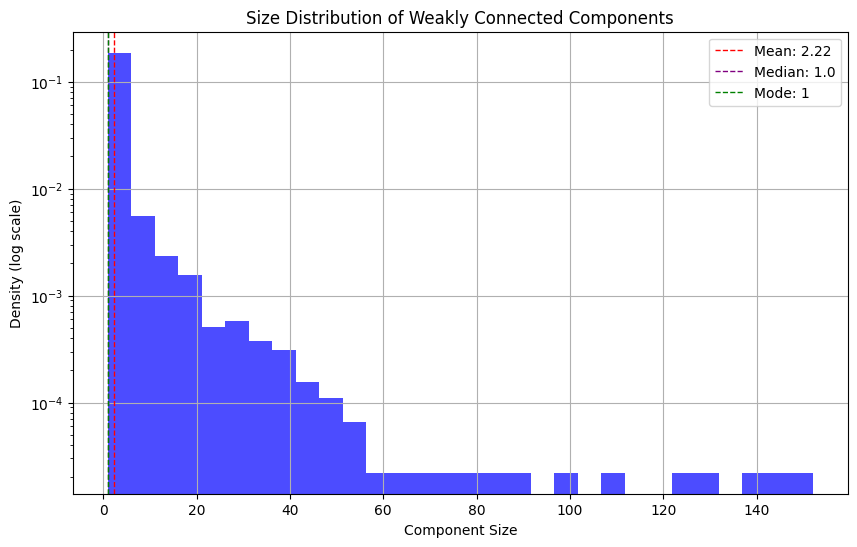

/var/folders/lm/19nvcr8165sg016zr309_t000000gn/T/ipykernel_1652/3148364439.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(component_sizes, shade=True, color='green', cumulative=False)


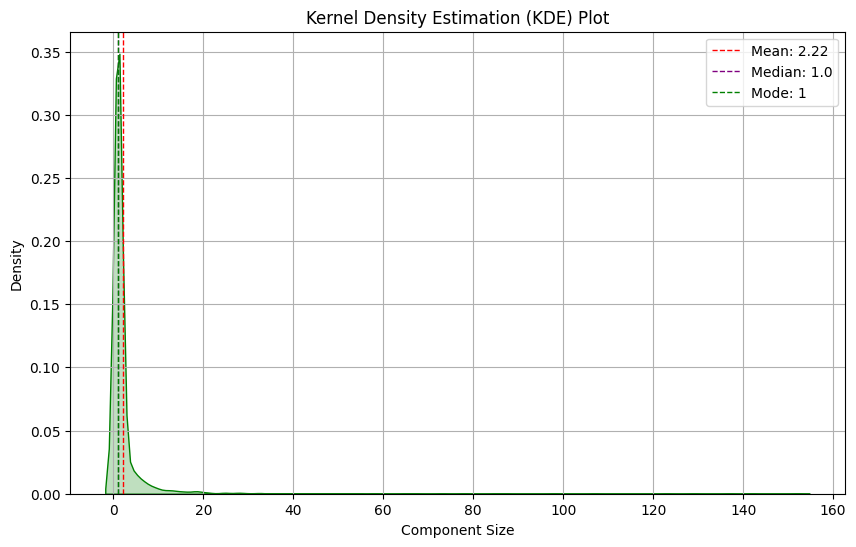

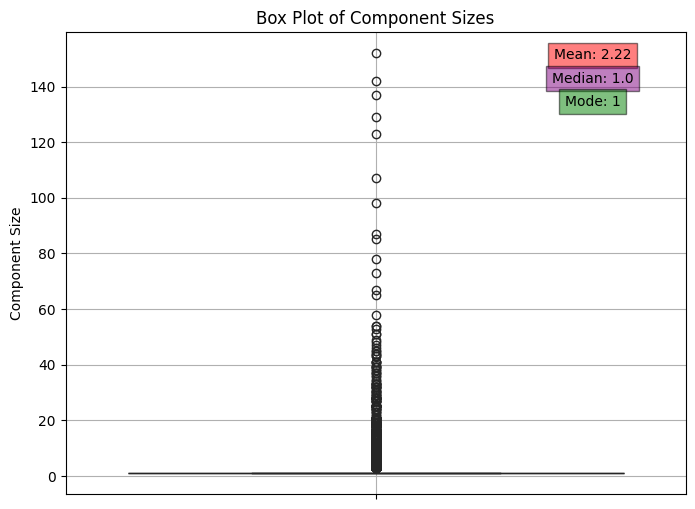

In [11]:
plot_graph_order_distribution(weakly_connected_components)

In [192]:
def decode_state_industry(state_industry_string):
    state_code, industry_code = state_industry_string.split("-")
    state = state_code_map[state_code]
    industry = industry_code_map[industry_code]
    return state, industry

    
def show_network_global_coloring(G: nx.DiGraph, global_min_wealth: float, global_max_wealth: float):
    any_node, data = next(iter(G.nodes(data=True)), (None, {}))
    state, industry = decode_state_industry(data.get('state_x_industry', ''))
    
    # Create figure and axis explicitly
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Compute node positions
    if len(G) > 50:
        # spiral layout is better/clearer for bigger graphs
        positions = nx.spiral_layout(G)
    else:
        positions = nx.circular_layout(G)
    
    # Extracting wealth attribute for coloring nodes
    wealth_values = np.array([data.get('wealth_proxy', 0) for _, data in G.nodes(data=True)])
    
    # Use global min and max for normalization
    norm_nodes = Normalize(vmin=global_min_wealth, vmax=global_max_wealth)
    
    # Draw nodes with color based on wealth attribute
    node_color_map = plt.cm.Blues
    node_colors = [node_color_map(norm_nodes(value)) for value in wealth_values]
    
    nx.draw_networkx_nodes(
        G,
        pos=positions,
        node_color=node_colors,
        node_size=100,
        edgecolors='black',
        ax=ax
    )
    
    # Draw edges with color based on weight attribute
    edge_weights = np.array([data.get('weight', 1) for _, _, data in G.edges(data=True)])
    min_edge_weight = global_min_wealth
    max_edge_weight = global_max_wealth

    edge_color_map = plt.cm.Grays
    norm_edges = Normalize(vmin=min_edge_weight, vmax=max_edge_weight)
    edge_colors = [edge_color_map(norm_edges(value)) for value in edge_weights]
    
    
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2].get('weight', 1))
    
    for u, v, data in sorted_edges:
        weight = data.get('weight', 1)
        edge_color = edge_color_map(norm_edges(weight))
        nx.draw_networkx_edges(
            G,
            pos=positions,
            edgelist=[(u, v)],
            edge_color=[edge_color],
            width=2.0,
            alpha=0.7,
            arrows=True,
            ax=ax
        )
    
    # Create colorbars
    sm_node = plt.cm.ScalarMappable(cmap=node_color_map, norm=norm_nodes)
    sm_node.set_array([])  # Dummy variable for the colorbar
    cbar_node = plt.colorbar(sm_node, ax=ax, label='Node Wealth')
    
    sm_edge = plt.cm.ScalarMappable(cmap=edge_color_map, norm=norm_edges)
    sm_edge.set_array([])  # Dummy variable for the colorbar
    cbar_edge = plt.colorbar(sm_edge, ax=ax, label='Edge Weight')
    
    # Adjust colorbar placement
    cbar_node.ax.locator_params(nbins=8)  # Adjust number of ticks as needed
    cbar_edge.ax.locator_params(nbins=8)  # Adjust number of ticks as needed
    
    # Add title to the plot
    plt.title(f"Subsample of {state}'s {industry} industry")
    plt.axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

In [193]:
def show_network_local_coloring(G: nx.DiGraph):
    any_node, data = next(iter(G.nodes(data=True)), (None, {}))
    state, industry = decode_state_industry(data.get('state_x_industry', ''))
    
    # Create figure and axis explicitly
    fig, ax = plt.subplots(figsize=(12, 8))

    # Compute node positions
    if len(G) > 50:
        # spiral layout is better/clearer for bigger graphs
        positions = nx.spiral_layout(G)
    else:
        positions = nx.circular_layout(G)
    
    # Extracting wealth attribute for coloring nodes
    wealth_values = np.array([data.get('wealth_proxy', 0) for _, data in G.nodes(data=True)])
    min_wealth = np.min(wealth_values)
    max_wealth = np.max(wealth_values)
    
    # Draw nodes with color based on wealth attribute
    node_color_map = plt.cm.Blues
    norm_nodes = Normalize(vmin=min_wealth, vmax=max_wealth)
    node_colors = [node_color_map(norm_nodes(value)) for value in wealth_values]
    
    nx.draw_networkx_nodes(
        G,
        pos=positions,
        node_color=node_colors,
        node_size=100,
        edgecolors='black',
        ax=ax
    )
    
    # Draw edges with color based on weight attribute
    edge_weights = np.array([data.get('weight', 1) for _, _, data in G.edges(data=True)])
    min_edge_weight = np.min(edge_weights)
    max_edge_weight = np.max(edge_weights)
    edge_color_map = plt.cm.Grays
    norm_edges = Normalize(vmin=min_edge_weight, vmax=max_edge_weight)
    edge_colors = [edge_color_map(norm_edges(value)) for value in edge_weights]
    
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2].get('weight', 1))
    
    for u, v, data in sorted_edges:
        weight = data.get('weight', 1)
        edge_color = edge_color_map(norm_edges(weight))
        nx.draw_networkx_edges(
            G,
            pos=positions,
            edgelist=[(u, v)],
            edge_color=[edge_color],
            width=2.0,
            alpha=0.7,
            arrows=True,
            ax=ax
        )
    
    # Create colorbars
    sm_node = plt.cm.ScalarMappable(cmap=node_color_map, norm=norm_nodes)
    sm_node.set_array([])  # Dummy variable for the colorbar
    cbar_node = plt.colorbar(sm_node, ax=ax, label='Node Wealth', aspect=40)
    
    sm_edge = plt.cm.ScalarMappable(cmap=edge_color_map, norm=norm_edges)
    sm_edge.set_array([])  # Dummy variable for the colorbar
    cbar_edge = plt.colorbar(sm_edge, ax=ax, label='Edge Weight', aspect=40)
    
    # Adjust colorbar placement
    cbar_node.ax.locator_params(nbins=8)  # Adjust number of ticks as needed
    cbar_edge.ax.locator_params(nbins=8)  # Adjust number of ticks as needed
    
    # Add title to the plot
    plt.title(f"Subsample of {state}'s {industry} Industry")
    plt.axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

In [194]:
# Calculate minimum and maximum values to standardize graph colorings
wealth_proxy_values = np.array([data.get('wealth_proxy', float('inf')) for _, data in graph.nodes(data=True)])

min_wealth = min(wealth_proxy_values)
max_wealth = max(wealth_proxy_values)

print(min_wealth)
print(max_wealth)

-9300
870000


In [201]:
components_to_display = [0, 1, 2, 3, 4, 5]

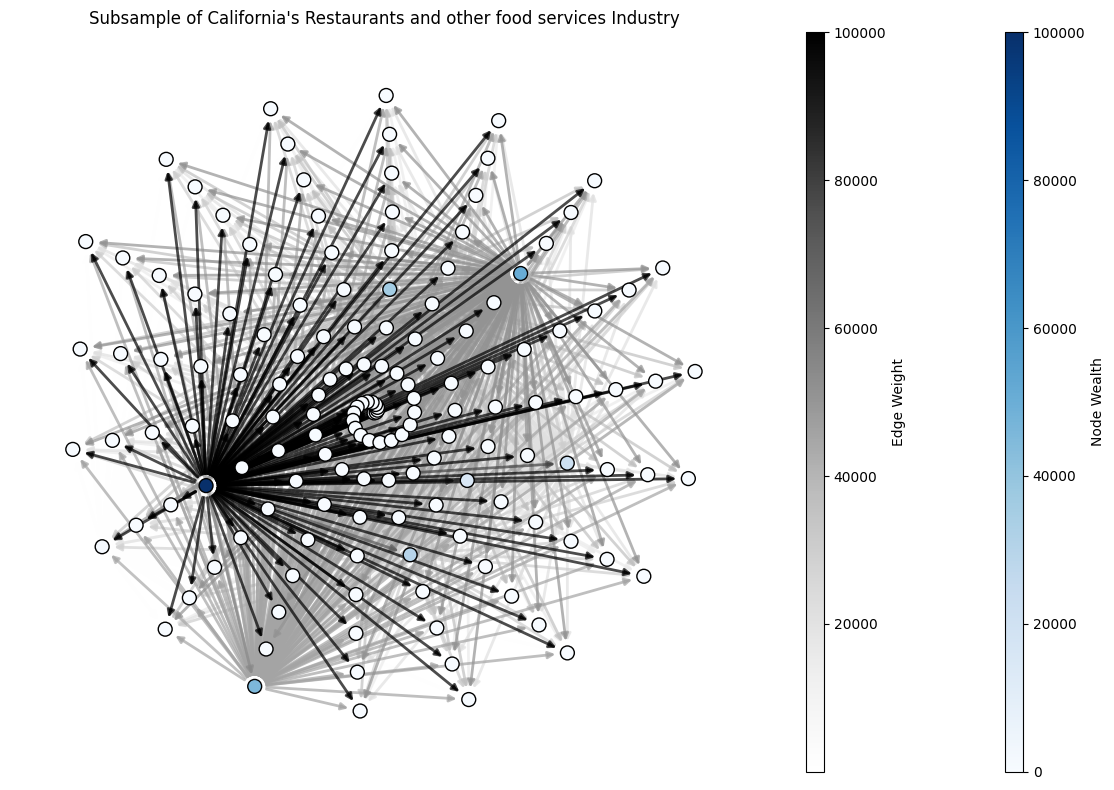

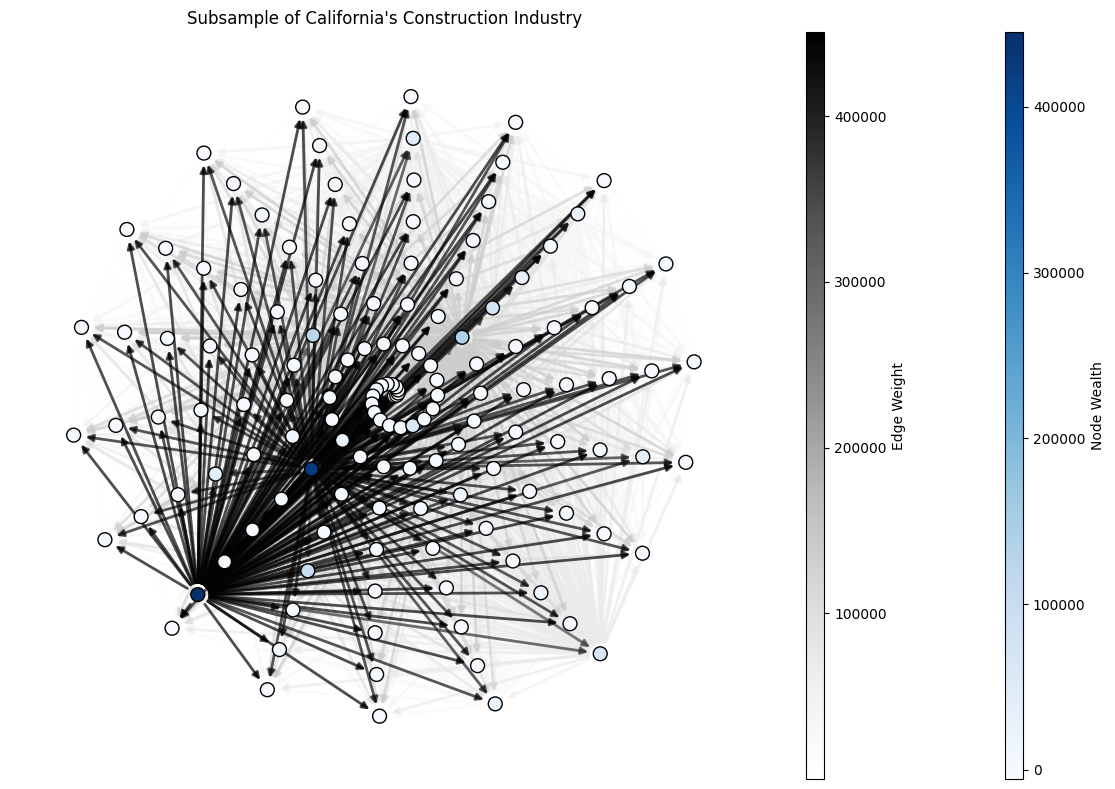

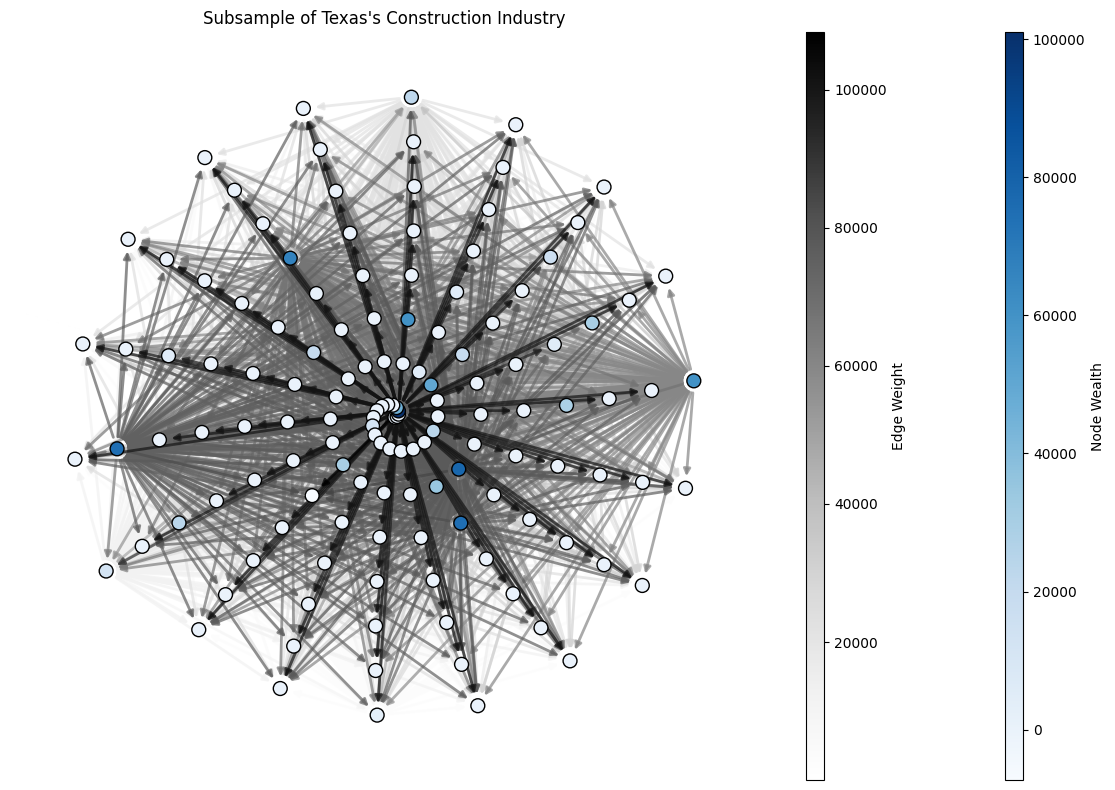

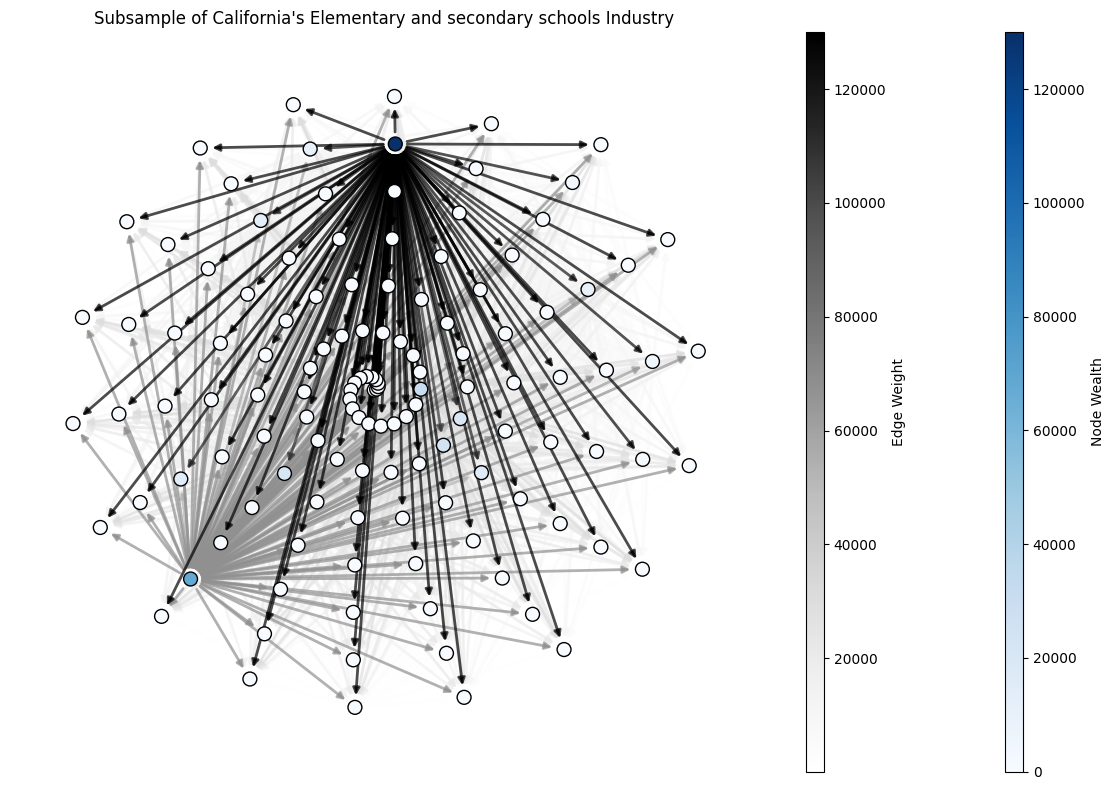

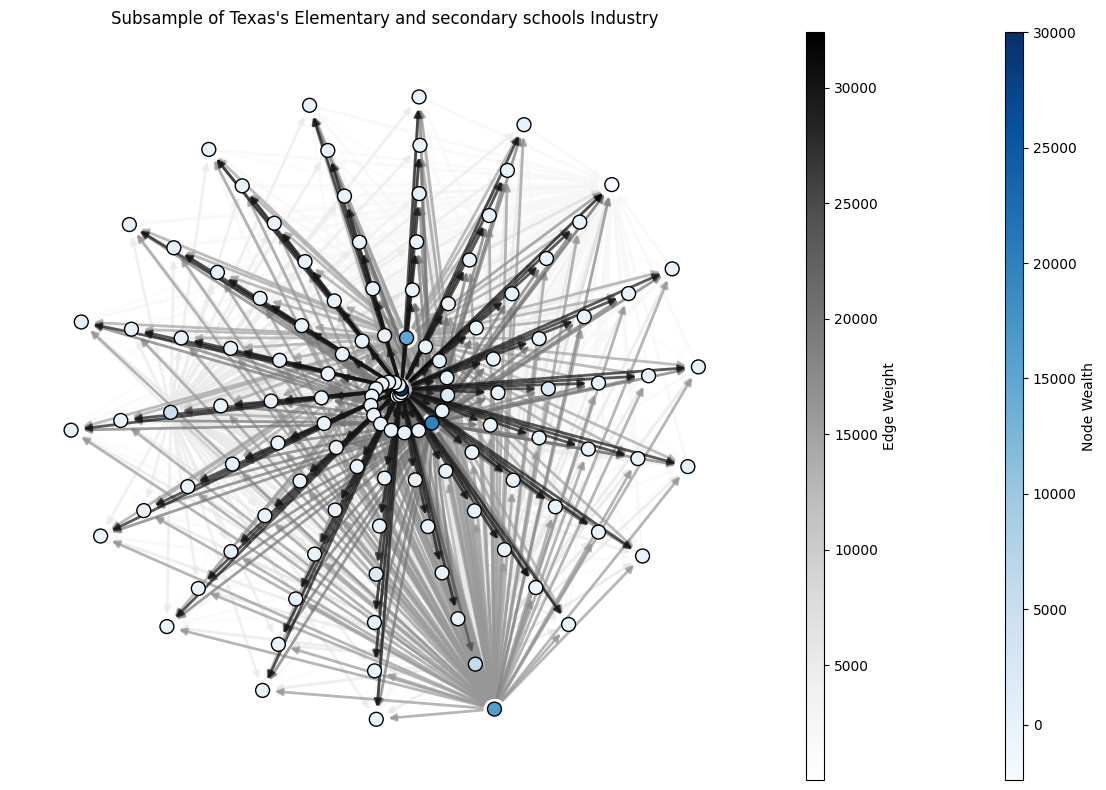

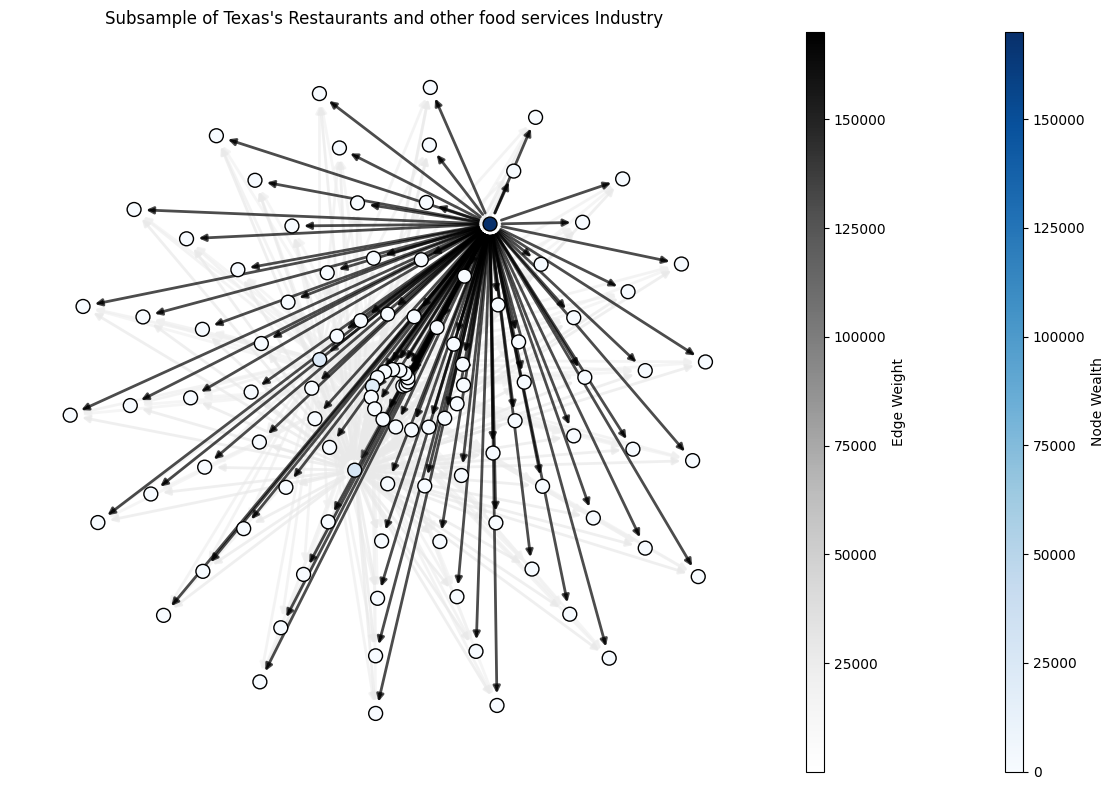

In [202]:
for network in components_to_display:
    subgraph = graph.subgraph(weakly_connected_components[network])
    show_network_local_coloring(subgraph)

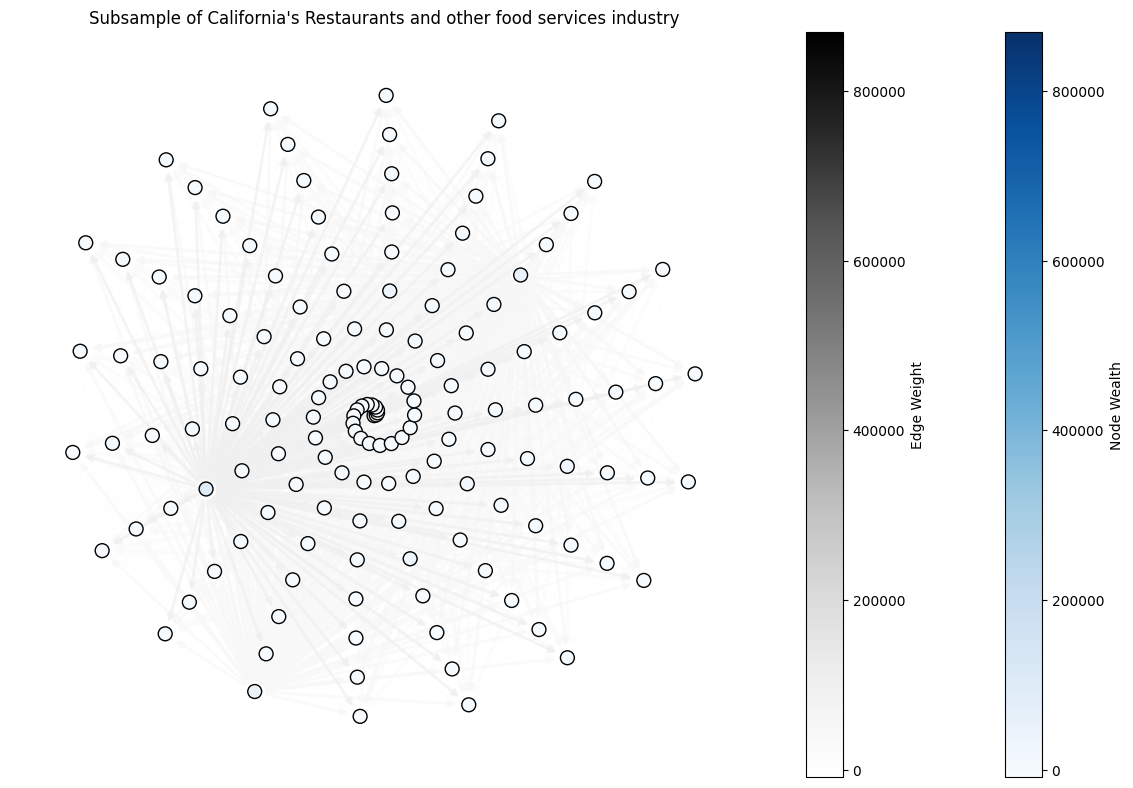

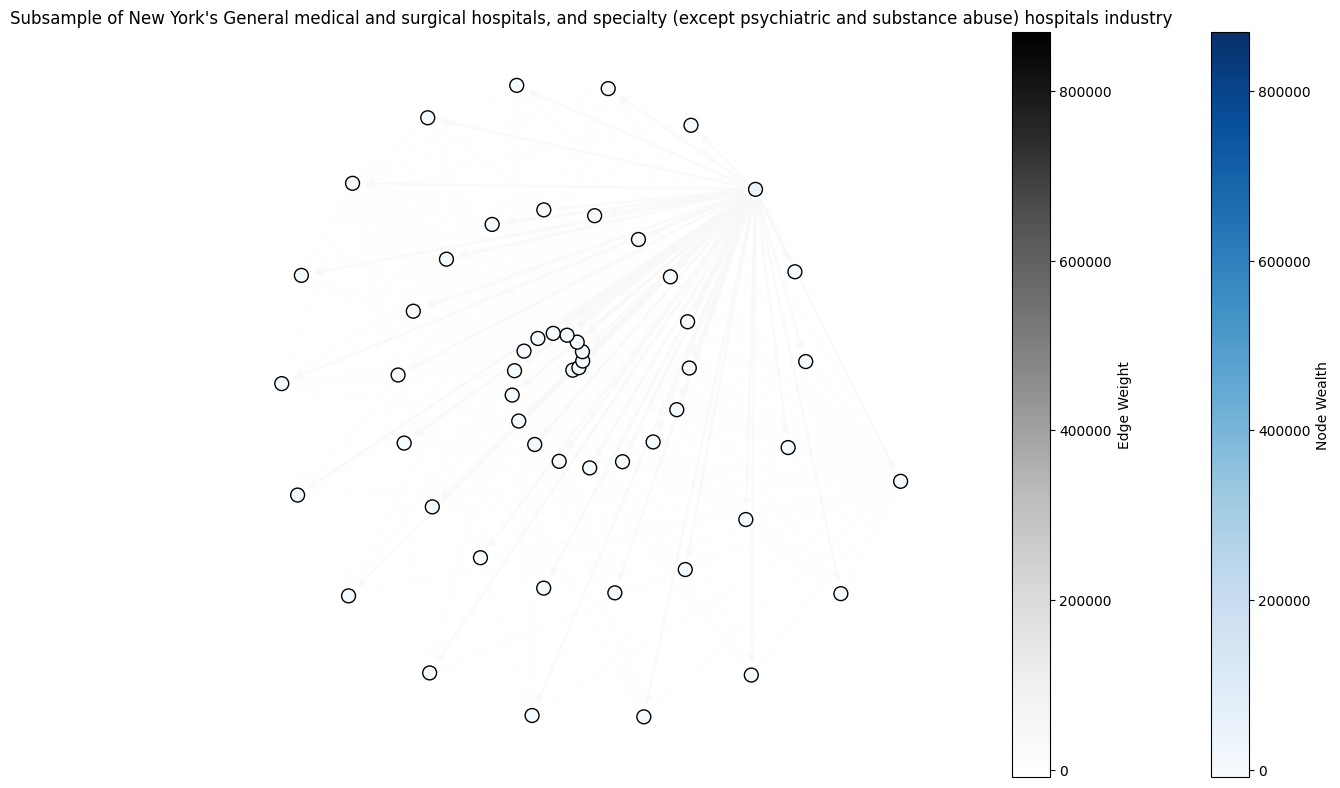

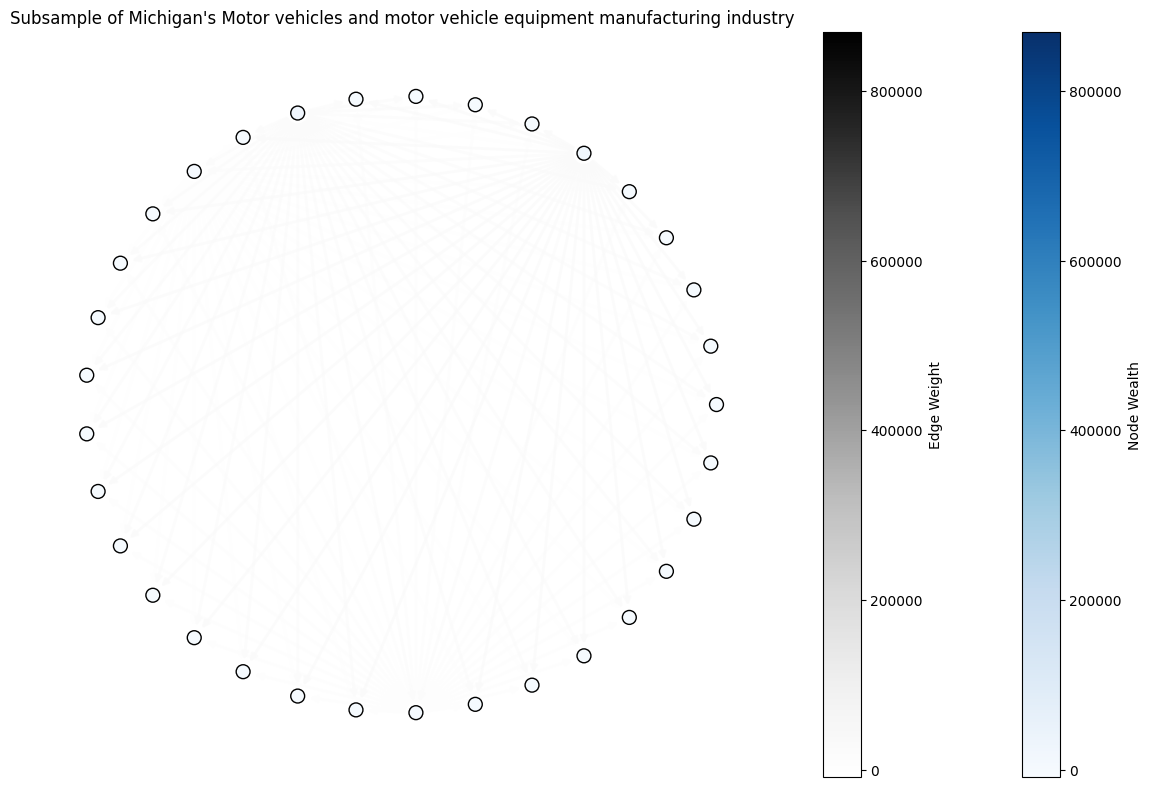

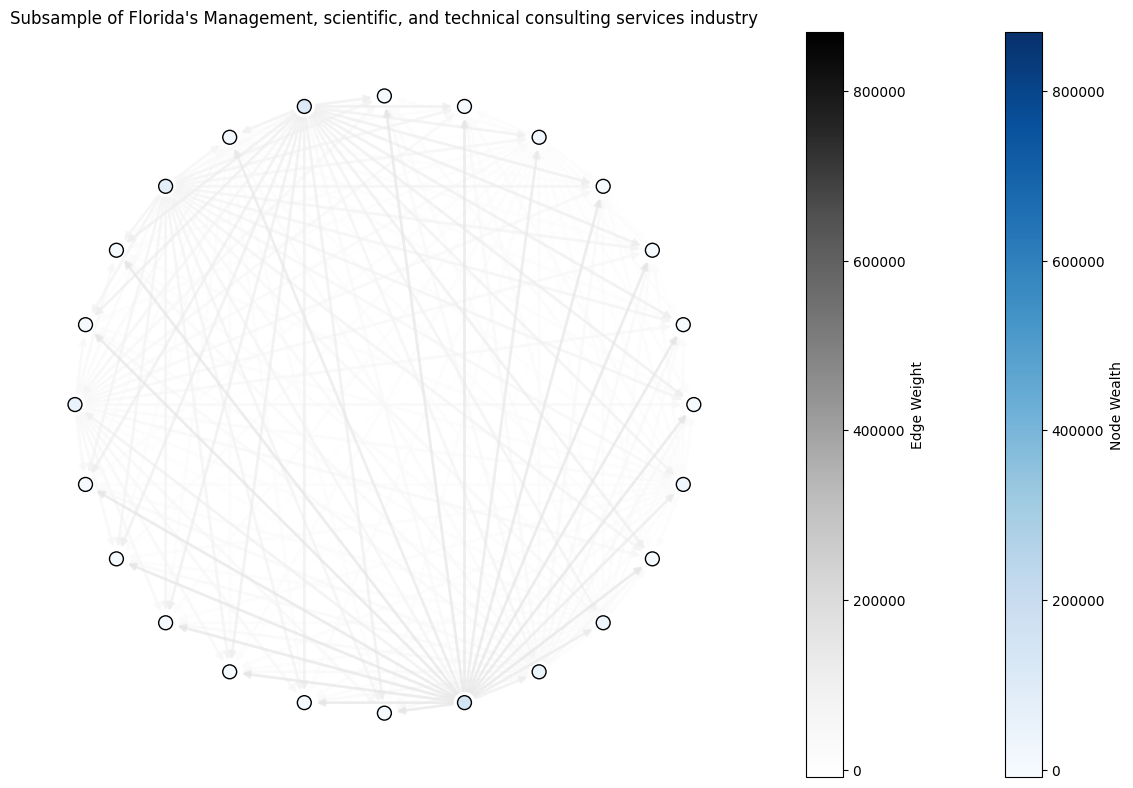

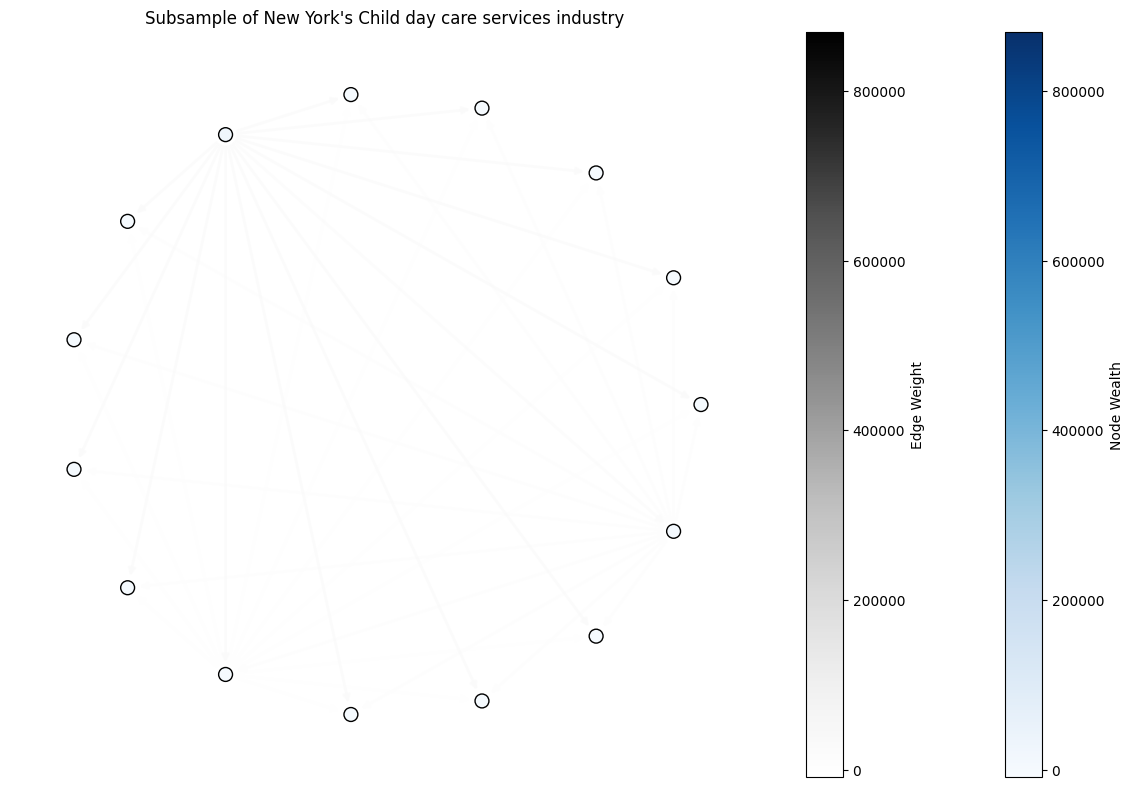

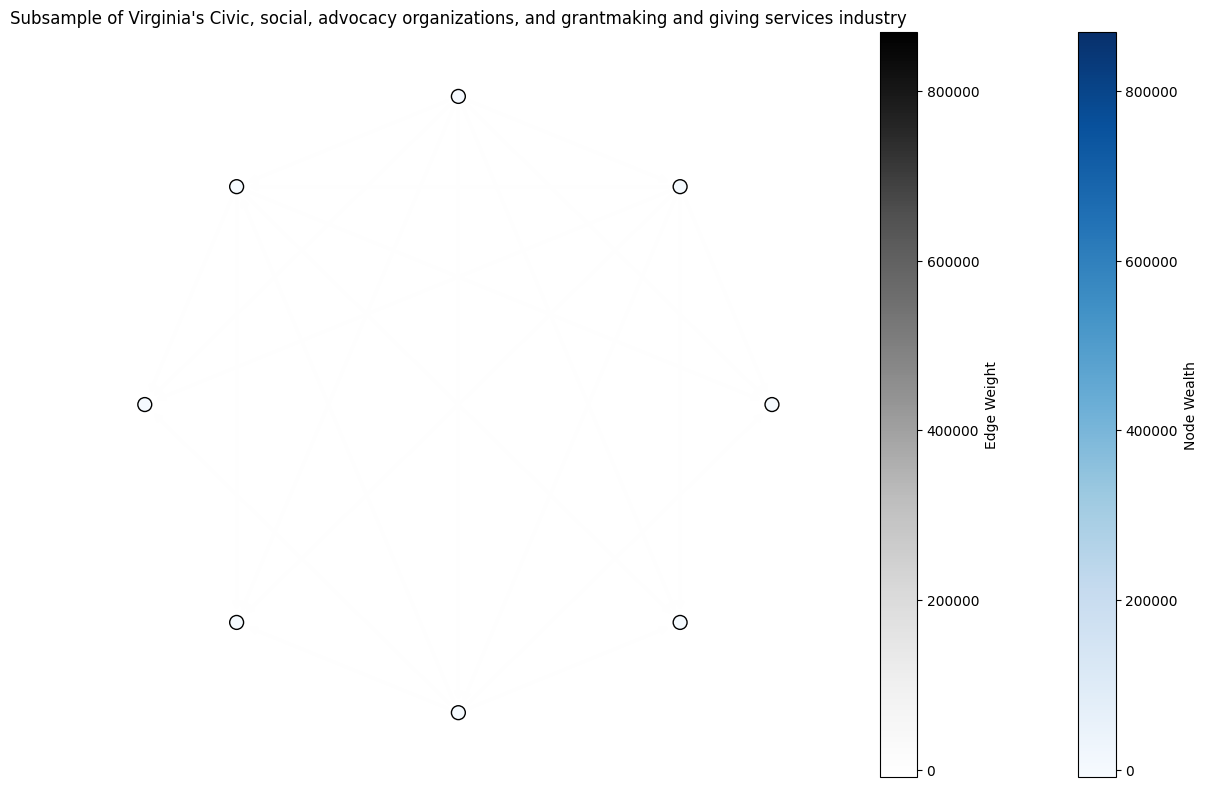

In [196]:
for network in components_to_display:
    subgraph = graph.subgraph(weakly_connected_components[network])
    show_network_global_coloring(subgraph, min_wealth, max_wealth)

In [29]:
len(weakly_connected_components[60])
# PASS IN layout
# 

152

In [ ]:
# edges weight by color
# nodes weight/ darkness by color
# display to be able to see lots of things